# Teoría de Algoritmos I - PD

## Tardos 6

### Exercise 1

Let G = (V , E) be an undirected graph with n nodes. Recall that a subset of the nodes is called an independent set if no two of them are joined by an edge. Finding large independent sets is difficult in general; but here we’ll see that it can be done efficiently if the graph is “simple” enough.

Call a graph G = (V , E) a path if its nodes can be written as v1, v2, . . . , vn, with an edge between vi and vj if and only if the numbers i and j differ by exactly 1. With each node vi, we associate a positive integer weight wi.

Consider, for example, the five-node path drawn in Figure 6.28. The weights are the numbers drawn inside the nodes.

```1 -> 8 -> 6 -> 3 -> 6```

The goal in this question is to solve the following problem:

> Find an independent set in a path G whose total weight is as large as possible.

(a) Give an example to show that the following algorithm does not always find an independent set of maximum total weight.

```
The "heaviest-first" greedy algorithm 
    Start with S equal to the empty set 
    While some node remains in G
        Pick a node vi of maximum weight 
        Add vi to S
        Delete vi and its neighbors from G
    Endwhile 
    Return S
```

(b) Give an example to show that the following algorithm also does not always find an independent set of maximum total weight.

```
Let S1 be the set of all vi where i is an odd number 
Let S2 be the set of all vi where i is an even number 
(Note that S1 and S2 are both independent sets) 
Determine which of S1 or S2 has greater total weight,
      and return this one
```

(c) Give an algorithm that takes an n-node path G with weights and returns an independent set of maximum total weight. The running time should be polynomial in n, independent of the values of the weights.

(a) ```9 -> 10 -> 2```

(b) ```1 -> 8 -> 6 -> 3 -> 6```

(c)

In [18]:
def max_total_weight(A):
    PD = [0]*len(A)
    for i in range(len(A)):
        PD[i] = max(PD[i-2] if i-2>=0 else 0, PD[i-3] if i-3>=0 else 0) + A[i]
    return PD

### Exercise 2

Suppose you’re managing a consulting team of expert computer hackers, and each week you have to choose a job for them to undertake. Now, as you can well imagine, the set of possible jobs is divided into those that are low-stress (e.g., setting up a Web site for a class at the local elementary school) and those that are high-stress (e.g., protecting the nation’s most valuable secrets, or helping a desperate group of Cornell students finish a project that has something to do with compilers). The basic question, each week, is whether to take on a low-stress job or a high-stress job.

If you select a low-stress job for your team in week i, then you get a revenue of li > 0 dollars; if you select a high-stress job, you get a revenue of hi > 0 dollars. The catch, however, is that in order for the team to take on a high-stress job in week i, it’s required that they do no job (of either type) in week i − 1; they need a full week of prep time to get ready for the crushing stress level. On the other hand, it’s okay for them to take a low- stress job in week i even if they have done a job (of either type) in week i − 1.

So, given a sequence of n weeks, a plan is specified by a choice of “low-stress,” “high-stress,” or “none” for each of the n weeks, with the property that if “high-stress” is chosen for week i > 1, then “none” has to be chosen for week i − 1. (It’s okay to choose a high-stress job in week 1.) The value of the plan is determined in the natural way: for each i, you add li to the value if you choose “low-stress” in week i, and you add hi to the value if you choose “high-stress” in week i. (You add 0 if you choose “none” in week i.)

**The problem**. Given sets of values l1, l2,..., ln and h1, h2, ..., hn, find a plan of maximum value. (Such a plan will be called optimal.)

In [21]:
def max_plan(L, H):
    PD = [0]*len(L)
    for i in range(len(L)):
        PD[i] = max((PD[i-1] if i-1>0 else 0)+L[i], (PD[i-2] if i-2>0 else 0)+H[i])
    return PD

max_plan([10,1,10,10],[5,50,5,1])

[10, 50, 60, 70]

### Exercise 3

Let G=(V,E) be a directed graph with nodes v1,...,vn. We say that G is an ordered graph if it has the following properties.

(i) Each edge goes from a node with a lower index to a node with a higher index. That is, every directed edge has the form (vi, vj) with i < j.

(ii) Each node except vn has at least one edge leaving it.That is,for every node vi, i = 1, 2, . . . , n − 1, there is at least one edge of the form (vi, vj).

The length of a path is the number of edges in it. The goal in this
question is to solve the following problem (see Figure 6.29 for an exam- ple).

> Given an ordered graph G, find the length of the longest path that begins at v1 and ends at vn.

In [34]:
def longest_path(G):
    PD = [0]*len(G)
    for i in range(len(G)-1, -1, -1):
        print(i, G[i])
        PD[i] = max(map(lambda v: PD[v]+1, G[i]), default=0)
    return PD
        
G = [
    [1,3],
    [3,4],
    [3],
    [4],
    []
]

longest_path(G)

4 []
3 [4]
2 [3]
1 [3, 4]
0 [1, 3]


[3, 2, 2, 1, 0]

### Exercise 4 

Suppose you’re running a light weight consulting business—just you, two associates, and some rented equipment. Your clients are distributed between the East Coast and the West Coast, and this leads to the following question.
Each month, you can either run your business from an office in New York (NY) or from an office in San Francisco (SF). In month i, you’ll incur an operating cost of Ni if you run the business out of NY; you’ll incur an operating cost of Si if you run the business out of SF. (It depends on the distribution of client demands for that month.)
However, if you run the business out of one city in month i, and then out of the other city in month i + 1, then you incur a fixed moving cost of M to switch base offices.
Given a sequence of n months, a plan is a sequence of n locations— each one equal to either NY or SF—such that the ith location indicates the city in which you will be based in the ith month. The cost of a plan is the sum of the operating costs for each of the n months, plus a moving cost of M for each time you switch cities. The plan can begin in either city.

**The problem.** Given a value for the moving cost M, and sequences of operating costs N1,...,Nn and S1,...,Sn, find a plan of minimum cost. (Such a plan will be called optimal.)

#### Solution

In [37]:
def min_plan(NY, SF, M):
    PD_NY = [0]*len(NY)
    PD_SF = [0]*len(SF)
    for i in range(len(NY)):
        PD_NY[i] = min(PD_NY[i-1], PD_SF[i-1]+M) + NY[i]
        PD_SF[i] = min(PD_SF[i-1], PD_NY[i-1]+M) + SF[i]
    return min(PD_NY[-1], PD_SF[-1])

NY = [1,3,20,30]
SF = [50,20,2,4]
M = 10

min_plan(NY, SF, M)

20

### Exercise 5

As some of you know well, and others of you may be interested to learn, a number of languages (including Chinese and Japanese) are written without spaces between the words. Consequently, software that works with text written in these languages must address the word segmentation problem—inferring likely boundaries between consecutive words in the ext. If English were written without spaces, the analogous problem would consist of taking a string like “meetateight” and deciding that the best segmentation is “meet at eight” (and not “me et at eight,” or “meet ate ight,” or any of a huge number of even less plausible alternatives). How could we automate this process?
A simple approach that is at least reasonably effective is to find a segmentation that simply maximizes the cumulative “quality” of its indi- vidual constituent words. Thus, suppose you are given a black box that, for any string of letters x = x1x2 . . . xk, will return a number quality(x). This number can be either positive or negative; larger numbers correspond to more plausible English words. (So quality(“me”) would be positive, while quality(“ght”) would be negative.)
Given a long string of letters y = y1y2 . . . yn, a segmentation of y is a partition of its letters into contiguous blocks of letters; each block corre- sponds to a word in the segmentation. The total quality of a segmentation is determined by adding up the qualities of each of its blocks. (So we’d get the right answer above provided that quality(“meet”) + quality(“at”) + quality(“eight”) was greater than the total quality of any other segmenta- tion of the string.)
Give an efficient algorithm that takes a string y and computes a segmentation of maximum total quality. (You can treat a single call to the black box computing quality(x) as a single computational step.)

#### Solution

$$PD[i] = max_{\forall j \leq i}\; (Q[j..i] + PD[j-1])$$

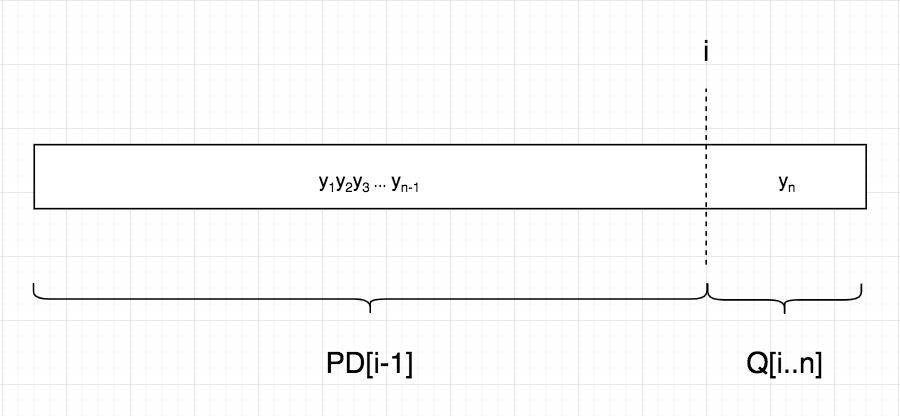

### Exercise 6

In a word processor, the goal of “pretty-printing” is to take text with a ragged right margin, and turn it into text whose right margin is as “even” as possible, like this.

To make this precise enough for us to start thinking about how to write a pretty-printer for text, we need to figure out what it means for the right margins to be “even.” So suppose our text consists of a sequence of words, W = {w1, w2, . . . , wn}, where wi consists of ci characters. We have a maximum line length of L. We will assume we have a fixed-width font and ignore issues of punctuation or hyphenation.

A formatting of W consists of a partition of the words in W into lines. In the words assigned to a single line, there should be a space after each word except the last; and so if wj , wj+1, . . . , wk are assigned to one line, then we should have

We will call an assignment of words to a line valid if it satisfies this inequality. The difference between the left-hand side and the right-hand side will be called the slack of the line—that is, the number of spaces left at the right margin.

Give an efficient algorithm to find a partition of a set of words W into valid lines, so that the sum of the squares of the slacks of all lines (including the last line) is minimized.

#### Solution

$$PD[i] = min_{\forall j \leq i}\; (S_{j..i}^2 + PD[j-1])$$


### Exercise 7 

As a solved exercise in Chapter 5, we gave an algorithm with O(n log n) running time for the following problem. We’re looking at the price of a given stock over n consecutive days, numbered i = 1, 2, . . . , n. For each day i, we have a price p(i) per share for the stock on that day. (We’ll assume for simplicity that the price was fixed during each day.) We’d like to know: How should we choose a day i on which to buy the stock and a later day j > i on which to sell it, if we want to maximize the profit per share, p(j) − p(i)? (If there is no way to make money during the n days, we should conclude this instead.)

In the solved exercise, we showed how to find the optimal pair of days i and j in time O(n log n). But, in fact, it’s possible to do better than this. Show how to find the optimal numbers i and j in time O(n).

#### Solution

$$PD[i] = max\;(0, PD[i-1] + p(i) + p(i-1))$$

### Exercise 8

The residents of the underground city of Zion defend themselves through a combination of kung fu, heavy artillery, and efficient algorithms. Re- cently they have become interested in automated methods that can help fend off attacks by swarms of robots.
Here’s what one of these robot attacks looks like.

- A swarm of robots arrives over the course of n seconds; in the ith second, xi robots arrive. Based on remote sensing data, you know this sequence x1, x2, . . . , xn in advance.
- You have at your disposal an electromagnetic pulse (EMP), which can destroy some of the robots as they arrive; the EMP’s power depends on how long it’s been allowed to charge up. To make this precise, there is a function f (·) so that if j seconds have passed since the EMP was last used, then it is capable of destroying up to f (j) robots.
- So specifically, if it is used in the kth second, and it has been j seconds since it was previously used, then it will destroy min(xk , f (j)) robots. (After this use, it will be completely drained.)
- We will also assume that the EMP starts off completely drained, so if it is used for the first time in the jth second, then it is capable of destroying up to f (j) robots.

The problem. Given the data on robot arrivals x1, x2, . . . , xn, and given the recharging function f (·), choose the points in time at which you’re going to activate the EMP so as to destroy as many robots as possible.

#### Solution

$$PD[i] = max_{j<i}\;(PD[j] + min(f(i-j), x_{i}))$$

### Exercise 9

You’re helping to run a high-performance computing system capable of processing several terabytes of data per day. For each of n days, you’re presented with a quantity of data; on day i, you’re presented with xi terabytes. For each terabyte you process, you receive a fixed revenue, but any unprocessed data becomes unavailable at the end of the day (i.e., you can’t work on it in any future day).

You can’t always process everything each day because you’re con- strained by the capabilities of your computing system, which can only process a fixed number of terabytes in a given day. In fact, it’s running some one-of-a-kind software that, while very sophisticated, is not totally reliable, and so the amount of data you can process goes down with each day that passes since the most recent reboot of the system. On the first day after a reboot, you can process s1 terabytes, on the second day after a reboot, you can process s2 terabytes, and so on, up to sn; we assume s1 > s2 > s3 > . . . > sn > 0. (Of course, on day i you can only process up to xi terabytes, regardless of how fast your system is.) To get the system back to peak performance, you can choose to reboot it; but on any day you choose to reboot the system, you can’t process any data at all.

**The problem.** Given the amounts of available data x1, x2, . . . , xn for the next n days, and given the profile of your system as expressed by s1, s2, . . . , sn (and starting from a freshly rebooted system on day 1), choose he days on which you’re going to reboot so as to maximize the total amount of data you process.

#### Solution

Si $j = 0$
$$PD[i][j] = max_{k<i-1}\;(PD[i-1][k])$$

Si $j \neq 0$
$$PD[i][j] = min(x_i, s_j) + PD[i-1][j-1]$$

### Exercise 10


You’re trying to run a large computing job in which you need to simulate a physical system for as many discrete steps as you can. The lab you’re working in has two large supercomputers (which we’ll call A and B) which are capable of processing this job. However, you’re not one of the high- priority users of these supercomputers, so at any given point in time, you’re only able to use as many spare cycles as these machines have available.

Here’s the problem you face. Your job can only run on one of the machines in any given minute. Over each of the next n minutes, you have a “profile” of how much processing power is available on each machine. In minute i, you would be able to run ai > 0 steps of the simulation if your job is on machine A, and bi > 0 steps of the simulation if your job is on machine B. You also have the ability to move your job from one machine to the other; but doing this costs you a minute of time in which no processing is done on your job.

So, given a sequence of n minutes, a plan is specified by a choice of A, B, or “move” for each minute, with the property that choices A and B cannot appear in consecutive minutes. For example, if your job is on machine A in minute i, and you want to switch to machine B, then your choice for minute i + 1 must be move, and then your choice for minute i + 2 can be B. The value of a plan is the total number of steps that you manage to execute over the n minutes: so it’s the sum of ai over all minutes in which the job is on A, plus the sum of bi over all minutes in which the job is on B.

The problem. Given values a1, a2,..., an and b1, b2,..., bn, find a plan of maximum value. (Such a strategy will be called optimal.) Note that your plan can start with either of the machines A or B in minute 1.

#### Solution

$$PD[i][A] = max\;(PD[i-1][A], PD[i-2][B]) + A[i]$$
$$PD[i][B] = max\;(PD[i-1][B], PD[i-2][A]) + B[i]$$

### Exercise 11

Suppose you’re consulting for a company that manufactures PC equip- ment and ships it to distributors all over the country. For each of the next n weeks, they have a projected supply si of equipment (measured in pounds), which has to be shipped by an air freight carrier.

Each week’s supply can be carried by one of two air freight companies, A or B.
- Company A charges a fixed rate r per pound (so it costs r · si to ship a week’s supply si).
- Company B makes contracts for a fixed amount c per week, indepen- dent of the weight. However, contracts with company B must be made in blocks of four consecutive weeks at a time.

A schedule, for the PC company, is a choice of air freight company (A or B) for each of the n weeks, with the restriction that company B, whenever it is chosen, must be chosen for blocks of four contiguous weeks at a time. The cost of the schedule is the total amount paid to company A and B, according to the description above.

Give a polynomial-time algorithm that takes a sequence of supply values s1, s2, . . . , sn and returns a schedule of minimum cost.

#### Solution

$$PD[i] = min(PD[i-1] + A[i]*r, PD[i-4] + 4*c)$$


### Exercise 12

Suppose we want to replicate a file over a collection of n servers, labeled S1, S2, . . . , Sn. To place a copy of the file at server Si results in a placement cost of ci, for an integer ci > 0.

Now, if a user requests the file from server Si, and no copy of the file is present at Si, then the servers Si+1, Si+2, Si+3 . . . are searched in order until a copy of the file is finally found, say at server Sj, where j > i. This results in an access cost of j − i. (Note that the lower-indexed servers Si−1, Si−2, . . . are not consulted in this search.) The access cost is 0 if Si holds a copy of the file. We will require that a copy of the file be placed at server Sn, so that all such searches will terminate, at the latest, at Sn.

We’d like to place copies of the files at the servers so as to minimize the sum of placement and access costs. Formally, we say that a configu- rationisachoice,foreachserverSi withi=1,2,...,n−1,ofwhetherto place a copy of the file at Si or not. (Recall that a copy is always placed at Sn.) The total cost of a configuration is the sum of all placement costs for servers with a copy of the file, plus the sum of all access costs associated with all n servers.
Give a polynomial-time algorithm to find a configuration of minimum total cost.

#### Solution

$$PD[i] = C_{i} + min_{0 \leq j < i} \; \big[ PD[j] + {i-j\choose 2} \big]$$

### Exercise 13

The problem of searching for cycles in graphs arises naturally in financial trading applications. Consider a firm that trades shares in n different companies. For each pair i ̸= j, they maintain a trade ratio rij, meaning that one share of i trades for rij shares of j. Here we allow the rate r to be fractional; that is, r = 2 means that you can trade three shares of i to get ij 3 two shares of j.

A trading cycle for a sequence of shares i1, i2, . . . , ik consists of successively trading shares in company i1 for shares in company i2, then shares in company i2 for shares i3, and so on, finally trading shares in ik back to shares in company i1. After such a sequence of trades, one ends up with shares in the same company i1 that one starts with. Trading around a cycle is usually a bad idea, as you tend to end up with fewer shares than you started with. But occasionally, for short periods of time, there are opportunities to increase shares. We will call such a cycle an opportunity cycle, if trading along the cycle increases the number of shares. This happens exactly if the product of the ratios along the cycle is above 1. In analyzing the state of the market, a firm engaged in trading would like to know if there are any opportunity cycles.

Give a polynomial-time algorithm that finds such an opportunity cycle, if one exists.

#### Solution

$$\prod \; r_{ij} > 1 \iff \sum \; \log(r_{ij}) > 0 \iff \sum \; -\log(r_{ij}) < 0 \implies \textrm{Detección de ciclos negativos} $$


### Exercise 14

A large collection of mobile wireless devices can naturally form a network in which the devices are the nodes, and two devices x and y are connected by an edge if they are able to directly communicate with each other (e.g., by a short-range radio link). Such a network of wireless devices is a highly dynamic object, in which edges can appear and disappear over time as the devices move around. For instance, an edge (x, y) might disappear as x and y move far apart from each other and lose the ability to communicate directly.

In a network that changes over time, it is natural to look for efficient ways of maintaining a path between certain designated nodes. There are two opposing concerns in maintaining such a path: we want paths that are short, but we also do not want to have to change the path frequently as the network structure changes. (That is, we’d like a single path to continue working, if possible, even as the network gains and loses edges.) Here is a way we might model this problem.

Suppose we have a set of mobile nodes V, and at a particular point in time there is a set E0 of edges among these nodes. As the nodes move, the set of edges changes from E0 to E1, then to E2, then to E3, and so on, to an edgesetEb.Fori=0,1,2,...,b,letGi denotethegraph(V,Ei).Soifwewere to watch the structure of the network on the nodes V as a “time lapse,” it would look precisely like the sequence of graphs G0, G1, G2, . . . , Gb−1, Gb. We will assume that each of these graphs Gi is connected.

Now consider two particular nodes s, t ∈ V. For an s-t path P in one of the graphs Gi, we define the length of P to be simply the number of edges in P, and we denote this l(P). Our goal is to produce a sequence of pathsP0,P1,...,Pb sothatforeachi,Pi isans-tpathinGi.Wewantthe paths to be relatively short. We also do not want there to be too many changes—points at which the identity of the path switches. Formally, we define changes(P0,P1,...,Pb) to be the number of indices i (0≤i≤b−1) for which Pi ̸= Pi+1.

Fix a constant K > 0. We define the cost of the sequence of paths P0,P1,...,Pb to be

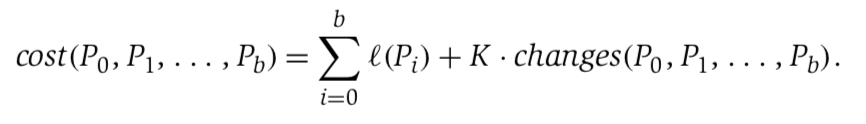

(a) Suppose it is possible to choose a single path P that is an s-t path in each of the graphs G0, G1, . . . , Gb. Give a polynomial-time algorithm to find the shortest such path.

(b) Give a polynomial-time algorithm to find a sequence of paths P0,P1,...,Pb of minimum cost, where Pi is an s-t path in Gi for i = 0, 1, . . . , b.

#### Solution

TODO

### Exercise 15

On most clear days, a group of your friends in the Astronomy Department gets together to plan out the astronomical events they’re going to try observing that night. We’ll make the following assumptions about the events.

- There are n events, which for simplicity we’ll assume occur in se- quence separated by exactly one minute each. Thus event j occurs at minute j; if they don’t observe this event at exactly minute j, then they miss out on it.
- The sky is mapped according to a one-dimensional coordinate system (measured in degrees from some central baseline); event j will be taking place at coordinate dj, for some integer value dj. The telescope starts at coordinate 0 at minute 0.
- The last event, n, is much more important than the others; so it is required that they observe event n.

The Astronomy Department operates a large telescope that can be used for viewing these events. Because it is such a complex instrument, it can only move at a rate of one degree per minute. Thus they do not expect to be able to observe all n events; they just want to observe as many as possible, limited by the operation of the telescope and the requirement that event n must be observed.
We say that a subset S of the events is viewable if it is possible to observe each event j ∈ S at its appointed time j, and the telescope has adequate time (moving at its maximum of one degree per minute) to move between consecutive events in S.

**The problem.** Given the coordinates of each of the n events, find a viewable subset of maximum size, subject to the requirement that it should contain event n. Such a solution will be called optimal.

#### Solution

$$PD[i] = 1 + \max \limits_{\forall j<i\;/\;|d_i - d_j| < |i-j|} PD[j]$$

### Exercise 16

There are many sunny days in Ithaca, New York; but this year, as it happens, the spring ROTC picnic at Cornell has fallen on a rainy day. The ranking officer decides to postpone the picnic and must notify everyone by phone. Here is the mechanism she uses to do this.

Each ROTC person on campus except the ranking officer reports to a unique superior officer. Thus the reporting hierarchy can be described by a tree T, rooted at the ranking officer, in which each other node v has a parent node u equal to his or her superior officer. Conversely, we will call v a direct subordinate of u. See Figure 6.30, in which A is the ranking officer, B and D are the direct subordinates of A, and C is the direct subordinate of B.
To notify everyone of the postponement, the ranking officer first calls each of her direct subordinates, one at a time. As soon as each subordinate gets the phone call, he or she must notify each of his or her direct subordinates, one at a time. The process continues this way until everyone has been notified. Note that each person in this process can only call direct subordinates on the phone; for example, in Figure 6.30, A would not be allowed to call C.

We can picture this process as being divided into rounds. In one round, each person who has already learned of the postponement can call one of his or her direct subordinates on the phone. The number of rounds it takes for everyone to be notified depends on the sequence in which each person calls their direct subordinates. For example, in Figure 6.30, it will take only two rounds if A starts by calling B, but it will take three rounds if A starts by calling D.

Give an efficient algorithm that determines the minimum number of rounds needed for everyone to be notified, and outputs a sequence of phone calls that achieves this minimum number of rounds.

#### Solution

TODO

### Exercise 17

Your friends have been studying the closing prices of tech stocks, looking for interesting patterns. They’ve defined something called a rising trend, as follows.

They have the closing price for a given stock recorded for n days in succession; let these prices be denoted P[1], P[2], . . . , P[n]. A rising trend in these prices is a subsequence of the prices P[i1], P[i2], . . . , P[ik], for days i1 < i2 < . . . < ik, so that
- $i_1 = 1, and$
- $P[i_j] < P[i_{j+1}] \;\;$ for each j = 1, 2, . . . , k − 1.

Thus a rising trend is a subsequence of the days—beginning on the first day and not necessarily contiguous—so that the price strictly increases over the days in this subsequence.

They are interested in finding the longest rising trend in a given sequence of prices.

#### Solution

$$PD[i] = 1 + \max \limits_{\forall j<i\;/\;P_j < P_i} PD[j]$$

### Exercise 18

Consider the sequence alignment problem over a four-letter alphabet {z1, z2, z3, z4}, with a given gap cost and given mismatch costs. Assume that each of these parameters is a positive integer.

Suppose you are given two strings A=a1a2 ...am and B=b1b2 ...bn and a proposed alignment between them. Give an O(mn) algorithm to decide whether this alignment is the unique minimum-cost alignment between A and B.

#### Solution

TODO

### Exercise 19

#### Solution

